In [33]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [34]:
data = pd.read_csv(rf'C:\Users\mqalborn\Desktop\GRAPEX\RIP\outcomes/shortwave_transmittance.csv').drop(['Unnamed: 0'], axis=1)

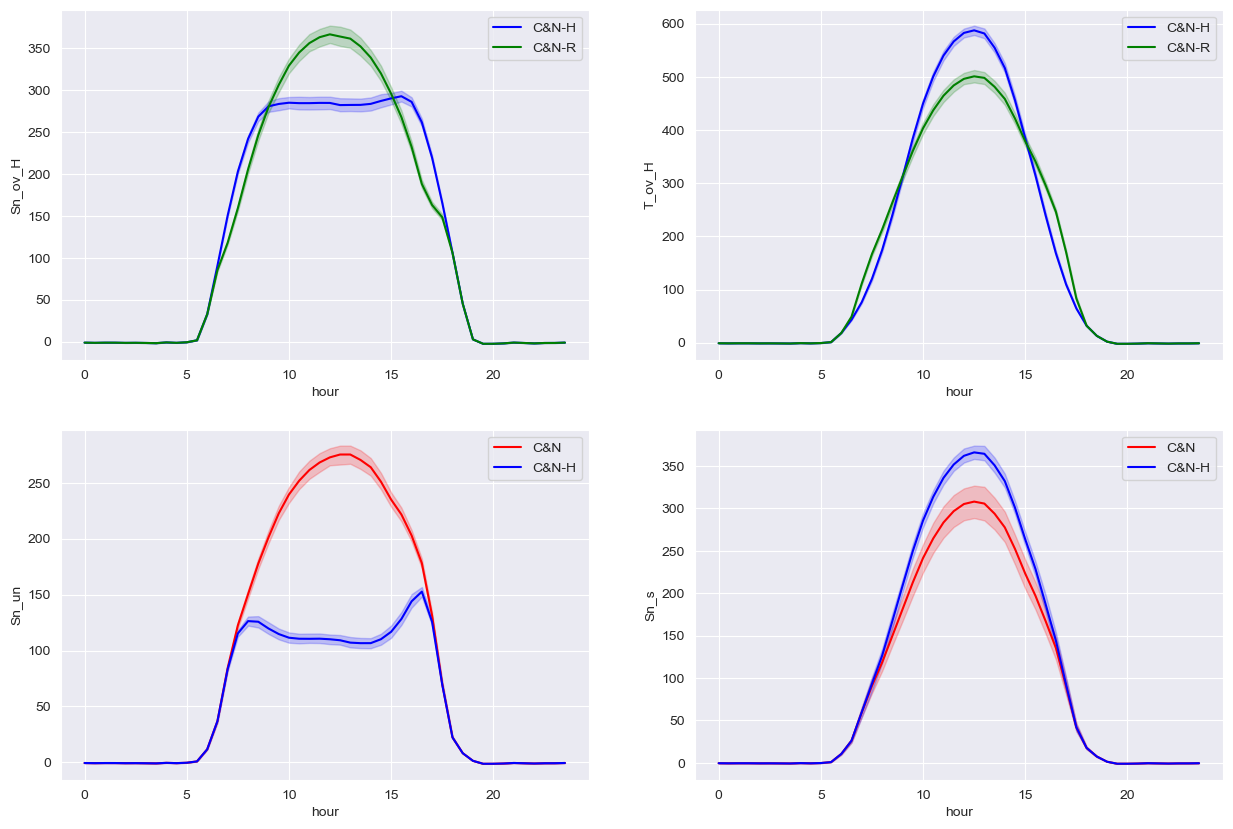

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

ax = axes[0, 0]
sns.lineplot(data=data, x='hour', y='Sn_ov_H', ax=ax, label='C&N-H', color='blue')
sns.lineplot(data=data, x='hour', y='Sn_ov_R', ax=ax, label='C&N-R', color='green')

ax = axes[0, 1]
sns.lineplot(data=data, x='hour', y='T_ov_H', ax=ax, label='C&N-H', color='blue')
sns.lineplot(data=data, x='hour', y='T_ov_R', ax=ax, label='C&N-R', color='green')

ax = axes[1, 0]
sns.lineplot(data=data, x='hour', y='Sn_un', ax=ax, label='C&N', color='red')
sns.lineplot(data=data, x='hour', y='Sn_un_H', ax=ax, label='C&N-H', color='blue')

ax = axes[1, 1]
sns.lineplot(data=data, x='hour', y='Sn_s', ax=ax, label='C&N', color='red')
sns.lineplot(data=data, x='hour', y='Sn_s_H', ax=ax, label='C&N-H', color='blue')
plt.show()

In [36]:
data = (data.groupby(['block', 'transect', 'tree'])
        .agg(Sn_ov_H=('Sn_ov_H', 'sum'),
             Sn_ov_R=('Sn_ov_R', 'sum'),
             Sn_un=('Sn_un', 'sum'),
             Sn_un_H=('Sn_un_H', 'sum'),
             Sn_s=('Sn_s', 'sum'),
             Sn_s_H=('Sn_s_H', 'sum')).reset_index())
data = data.melt(id_vars=['block', 'transect', 'tree', 'hour'], var_name='model', value_name='value')

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['hour']"

In [66]:
data

,block,transect,tree,hour,Sn_ov_H,Sn_ov_R,T_ov_H,T_ov_R,Sn_un,Sn_un_H,Sn_s,Sn_s_H
0,1,11,1,0.0,-1.251478,-1.251478,-0.934548,-0.934548,NaN,NaN,-0.764821,-0.764821
1,1,11,1,0.5,-1.482594,-1.482594,-1.107135,-1.107135,NaN,NaN,-0.906064,-0.906064
2,1,11,1,1.0,-1.291085,-1.291085,-0.964124,-0.964124,NaN,NaN,-0.789026,-0.789026
3,1,11,1,1.5,-1.309530,-1.309530,-0.977898,-0.977898,NaN,NaN,-0.800299,-0.800299
4,1,11,1,2.0,-1.537274,-1.537274,-1.147967,-1.147967,NaN,NaN,-0.939481,-0.939481
...,...,...,...,...,...,...,...,...,...,...,...,...
4795,4,433,1,21.5,-1.495420,-1.495420,-1.401051,-1.401051,NaN,NaN,-1.147803,-1.147803
4796,4,433,1,22.0,-1.902047,-1.902047,-1.782018,-1.782018,NaN,NaN,-1.459908,-1.459908
4797,4,433,1,22.5,-1.503039,-1.503039,-1.408190,-1.408190,NaN,NaN,-1.153652,-1.153652
4798,4,433,1,23.0,-1.461186,-1.461186,-1.368977,-1.368977,NaN,NaN,-1.121527,-1.121527


In [ ]:
sns.boxplot(data=data, x='fluxes', y='value', hue='model')
plt.show()

In [ ]:

con = data.model.isin(['Sn_ov_H', 'Sn_ov_R'])
data.loc[con, 'fluxes'] = 'Sn_ov'
con = data.model.isin(['T_ov_H', 'T_ov_R'])
data.loc[con, 'fluxes'] = 'T_ov'

con = data.model.isin(['Sn_un', 'Sn_un_H'])
data.loc[con, 'fluxes'] = 'Sn_un'
con = data.model.isin(['Sn_s', 'Sn_s_H'])
data.loc[con, 'fluxes'] = 'Sn_s'

con = data.model.isin(['Sn_ov_H', 'T_ov_H', 'Sn_un_H', 'Sn_s_H'])
data.loc[con, 'model'] = 'H'
con = data.model.isin(['Sn_ov_R', 'T_ov_R'])
data.loc[con, 'model'] = 'R'
con = data.model.isin(['Sn_un', 'Sn_s'])
data.loc[con, 'model'] = 'NC'

In [ ]:
sns.boxplot(data=data, x='fluxes', y='value', hue='model')
plt.show()
# order=['Sn_un', 'Sn_un_H', 'Sn_s', 'Sn_s_H'])